## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
heart = pd.read_csv('/content/drive/My Drive/ha_1.csv')

In [5]:
heart.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.special import expit, logit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from math import *

X = heart[['age', 'chol']]
y = heart['diagnosis'].apply(lambda x: 1 if x == 'Disease' else 0)  # Convert to binary

ct = ColumnTransformer(
  [("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
   [("preprocessing", ct),
    ("LogisticRegression", LogisticRegression())]
    )
lr_pipeline_fitted = lr_pipeline.fit(X, y)
lr_coef = lr_pipeline_fitted.named_steps['LogisticRegression'].coef_
lr_coef

array([[-0.04686331, -0.00180124]])

In [11]:
lr_intercept = lr_pipeline_fitted.named_steps['LogisticRegression'].intercept_
lr_intercept

array([3.24011226])

In [40]:
zi = log(0.9/0.1)
zi

2.1972245773362196

In [23]:
lr_chol = -((0.04686*55)-3.24011)/0.001
lr_chol

662.8099999999998

The minimum cholesterol for a doctor to determine heart disease for a 55 year old is 662.

In [24]:
lr_chol2 = (zi-((0.04686*55)-3.24))/0.001
lr_chol2

2859.9245773362195

The minimum cholesterol for a doctor to estimate a 90% chance of heart disease in a 55 year old would be 2860.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_pipeline = Pipeline(
   [("preprocessing", ct),
    ("LDA", LinearDiscriminantAnalysis())]
    )
lda_pipeline_fitted = lda_pipeline.fit(X, y)
lda_coef = lda_pipeline_fitted.named_steps['LDA'].coef_
-lda_coef

array([[0.04655744, 0.00178967]])

In [30]:
lda_intercept = lda_pipeline_fitted.named_steps['LDA'].intercept_
lda_intercept

array([3.21967766])

In [32]:
lda_chol = -((0.04656*55)-3.2197)/0.001
lda_chol

658.9

The minimum cholesterol for a doctor to determine heart disease for a 55 year old is 659.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [37]:
from sklearn.svm import SVC
svc_pipeline = Pipeline(
   [("preprocessing", ct),
    ("SVC", SVC(kernel='linear'))]
    )
svc_pipeline_fitted = svc_pipeline.fit(X, y)
svc_coef = svc_pipeline_fitted.named_steps['SVC'].coef_
-svc_coef

array([[0.06439847, 0.003659  ]])

In [39]:
svc_intercept = svc_pipeline_fitted.named_steps['SVC'].intercept_
svc_intercept

array([4.68608456])

In [42]:
svc_chol = -((0.064398*55)-4.68608)/0.003659
svc_chol

312.7056572834107

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

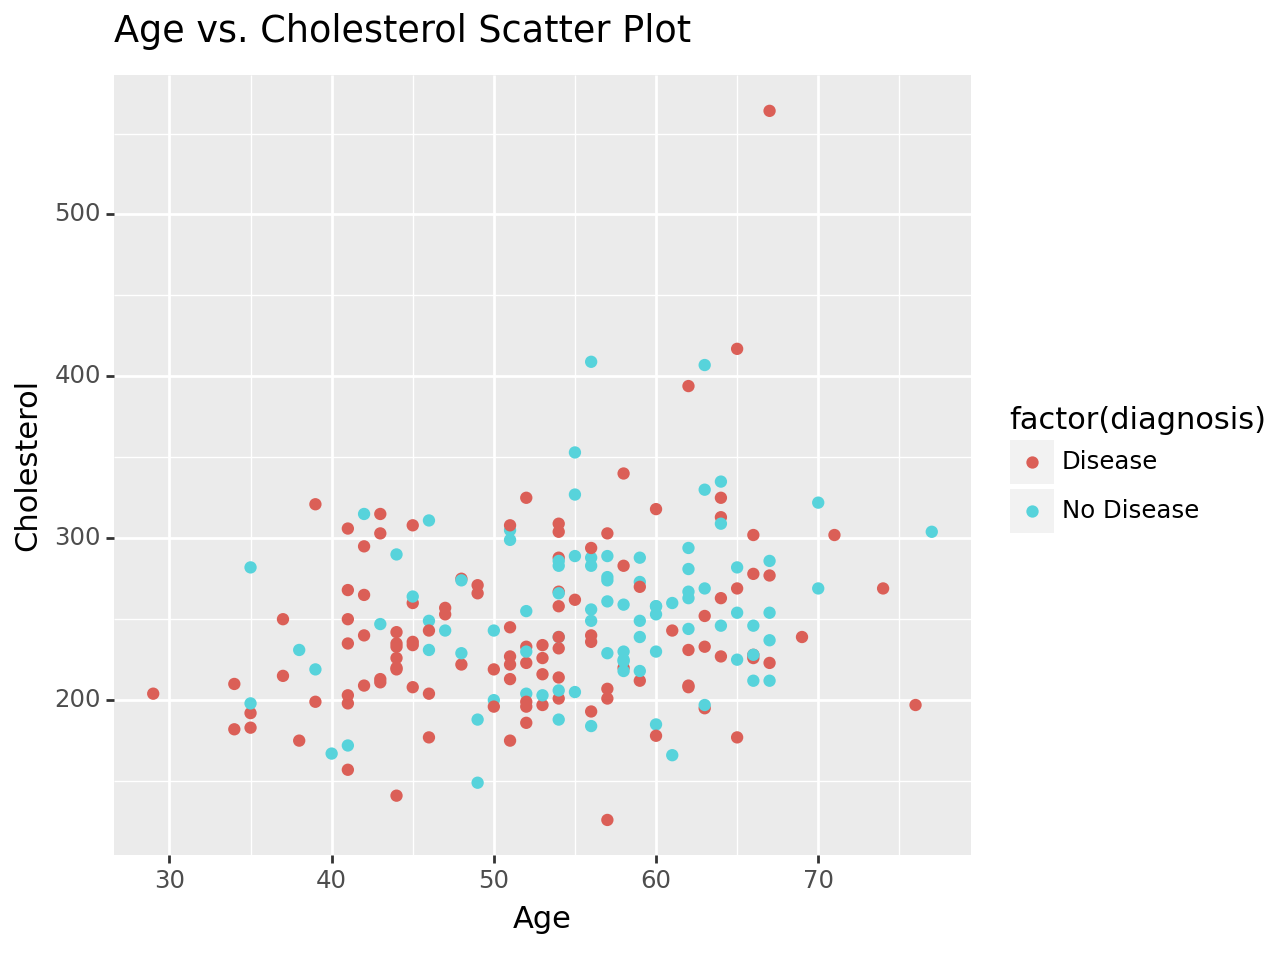

<Figure Size: (640 x 480)>

In [47]:
from plotnine import *
plot = ggplot(heart, aes(x='age', y='chol', color='factor(diagnosis)')) + geom_point() + labs(title='Age vs. Cholesterol Scatter Plot', x='Age', y='Cholesterol')

lr_age = lr_pipeline_fitted.named_steps['LogisticRegression'].coef_[0][0]
lr_intercept = lr_pipeline_fitted.named_steps['LogisticRegression'].intercept_
lda_age = lda_pipeline_fitted.named_steps['LDA'].coef_[0][0]
lda_intercept = lda_pipeline_fitted.named_steps['LDA'].intercept_
svc_age = svc_pipeline_fitted.named_steps['SVC'].coef_[0][0]
svc_intercept = svc_pipeline_fitted.named_steps['SVC'].intercept_

lr_line = geom_abline(intercept=-lr_intercept/lr_chol, slope=-lr_age/lda_chol, linetype='dashed', color='green')
lda_line = geom_abline(intercept=-lda_intercept/lda_chol, slope=-lda_age/lda_chol, linetype='dashed', color='blue')
svc_line = geom_abline(intercept=-svc_intercept/svc_chol, slope=-svc_age/svc_chol, linetype='dashed', color='red')

plot2 = plot + lr_line + lda_line + svc_line

plot2